In [11]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2


In [12]:
import os
import time
import uuid

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [4]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\RHM1983/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-1-25 Python-3.9.7 torch-1.12.0 CUDA:0 (NVIDIA GeForce RTX 2060, 12288MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [7]:
img = 'G:/CSE_498r/project/dataset/images/DSC_0460.JPG'

In [8]:
result = model(img)
result.print()

image 1/1: 2000x2992 3 persons, 1 bicycle, 4 cars
Speed: 380.3ms pre-process, 338.3ms inference, 290.3ms NMS per image at shape (1, 3, 448, 640)


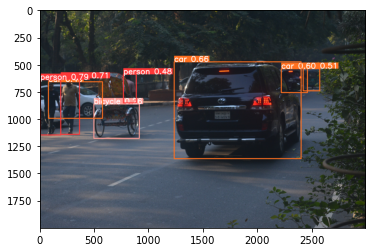

In [9]:
%matplotlib inline 
plt.imshow(np.squeeze(result.render()))
plt.show()

In [10]:
!cd yolov5 && python train.py --img 640 --batch 7 --epochs 2 --data dataset.yml --weights yolov5s.pt --workers 2 --device 1

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=2, batch_size=7, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=1, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-72-g064365d Python-3.9.7 torch-1.12.0 CUDA:1 (NVIDIA GeForce RTX 2060, 12288MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0

    return _run_module_code(code, init_globals, run_name,
  File "G:\CSE_445\Project\lib\runpy.py", line 97, in _run_module_code
    _run_code(code, mod_globals, init_globals,
  File "G:\CSE_445\Project\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "G:\CSE_498r\project\yolov5\train.py", line 42, in <module>
  File "G:\CSE_498r\project\yolov5\val.py", line 38, in <module>
    from models.common import DetectMultiBackend
  File "G:\CSE_498r\project\yolov5\models\common.py", line 29, in <module>
    from utils.dataloaders import exif_transpose, letterbox
  File "G:\CSE_498r\project\yolov5\utils\dataloaders.py", line 25, in <module>
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "G:\CSE_445\Project\lib\multiprocessing\spawn.py", line 116, in spawn_main
    exitcode = _main(fd, parent_sentinel)
  File "G:\CSE_445\Project\lib\multiprocessing\spawn.py", line 125, in _main
    prepare(preparation_data)
  File "G:\CSE_445\Project\lib\m

    VERSION_PEP440 = Regex(Specifier._regex_str, re.VERBOSE | re.IGNORECASE)
  File "G:\CSE_445\Project\lib\site-packages\pkg_resources\_vendor\pyparsing.py", line 2792, in __init__
    self.re = re.compile(self.pattern, self.flags)
  File "G:\CSE_445\Project\lib\re.py", line 252, in compile
    return _compile(pattern, flags)
  File "G:\CSE_445\Project\lib\re.py", line 304, in _compile
    p = sre_compile.compile(pattern, flags)
  File "G:\CSE_445\Project\lib\sre_compile.py", line 768, in compile
    code = _code(p, flags)
  File "G:\CSE_445\Project\lib\sre_compile.py", line 607, in _code
    _compile(code, p.data, flags)
  File "G:\CSE_445\Project\lib\sre_compile.py", line 168, in _compile
    _compile(code, p, _combine_flags(flags, add_flags, del_flags))
  File "G:\CSE_445\Project\lib\sre_compile.py", line 209, in _compile
    _compile(code, av, flags)
  File "G:\CSE_445\Project\lib\sre_compile.py", line 156, in _compile
    _compile(code, av[2], flags)
  File "G:\CSE_445\Project\li

        1/1      1.71G     0.1077    0.02007          0         12        640:  18%|#8        | 10/55 [00:08<00:34,  1.30it/s]
        1/1      1.71G     0.1077    0.02007          0         12        640:  20%|##        | 11/55 [00:08<00:46,  1.06s/it]
        1/1      1.71G     0.1084     0.0205          0         22        640:  20%|##        | 11/55 [00:08<00:46,  1.06s/it]
        1/1      1.71G     0.1084     0.0205          0         22        640:  22%|##1       | 12/55 [00:08<00:33,  1.29it/s]
        1/1      1.71G      0.108    0.02051          0         15        640:  22%|##1       | 12/55 [00:10<00:33,  1.29it/s]
        1/1      1.71G      0.108    0.02051          0         15        640:  24%|##3       | 13/55 [00:10<00:44,  1.06s/it]
        1/1      1.71G     0.1076    0.02047          0         12        640:  24%|##3       | 13/55 [00:10<00:44,  1.06s/it]
        1/1      1.71G     0.1076    0.02047          0         12        640:  25%|##5       | 14/55 [00:10<00

In [16]:
model01 = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp8/weights/last.pt')

Using cache found in C:\Users\RHM1983/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-1-25 Python-3.9.7 torch-1.12.0 CUDA:0 (NVIDIA GeForce RTX 2060, 12288MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [17]:
image = 'G:/CSE_498r/project/test_img.jpg'

In [18]:
result = model(image)
result.print()

image 1/1: 956x1300 (no detections)
Speed: 81.1ms pre-process, 78.1ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
